In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from datasets import load_dataset

#Load data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [102]:
df_US = df[df['job_country'] == 'United States']

In [103]:
df_skills = df_US.explode('job_skills')

In [104]:
df_skills.head(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,python,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,c++,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,java,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,matlab,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,aws,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,tensorflow,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,keras,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,pytorch,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,python,"{'cloud': ['gcp'], 'programming': ['python', '..."


In [105]:
df_skills_count = df_skills.groupby(['job_title_short', 'job_skills']).size()

In [106]:
df_skills_count = df_skills_count.reset_index(name = 'count')
df_skills_count

,job_title_short,job_skills,count
0,Business Analyst,airflow,38
1,Business Analyst,airtable,3
2,Business Analyst,alteryx,264
3,Business Analyst,angular,10
4,Business Analyst,ansible,3
...,...,...,...
1865,Software Engineer,wire,2
1866,Software Engineer,word,106
1867,Software Engineer,workfront,2
1868,Software Engineer,yarn,6


In [107]:
df_skills_count = df_skills_count.sort_values(by = 'count', ascending=False)

In [113]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Senior Data Engineer',
 'Business Analyst',
 'Software Engineer',
 'Machine Learning Engineer',
 'Cloud Engineer']

In [114]:
job_titles = job_titles[2:5]
job_titles

['Data Engineer', 'Senior Data Scientist', 'Senior Data Analyst']

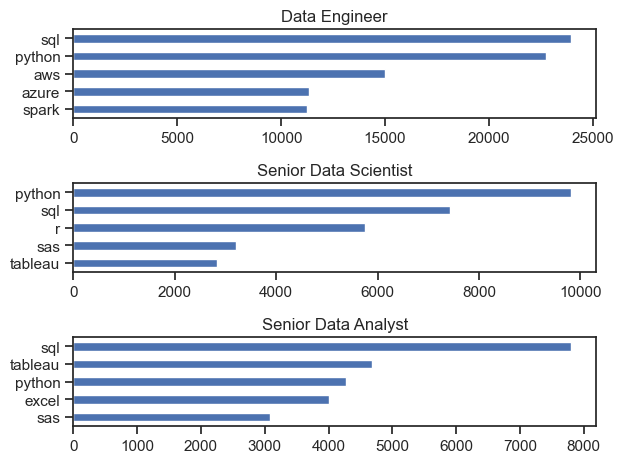

In [115]:
fig, ax = plt.subplots(3,1)

for i, job_title in  enumerate (job_titles):
    df_yo = df_skills_count[df_skills_count['job_title_short'] == job_title].sort_values(by = 'count', ascending = False).head(5)
    df_yo.plot(kind = 'barh', x = 'job_skills', y = 'count',ax = ax[i], title = job_title, legend = False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    
    plt.tight_layout()

In [121]:
df_job_count = df_US['job_title_short'].value_counts().reset_index(name = 'count_job')


In [122]:
df_skills_perc = pd.merge(df_skills_count, df_job_count, how = 'left', on = 'job_title_short')
df_skills_perc['skill_perc'] = (df_skills_perc['count'] / df_skills_perc['count_job']) * 100


In [123]:
df_skills_perc = df_skills_perc.sort_values(by = 'count', ascending= False)
df_skills_perc

,job_title_short,job_skills,count,count_job,skill_perc
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1865,Senior Data Engineer,elixir,1,9289,0.010765
1866,Software Engineer,sass,1,1814,0.055127
1867,Data Analyst,theano,1,67816,0.001475
1868,Software Engineer,theano,1,1814,0.055127


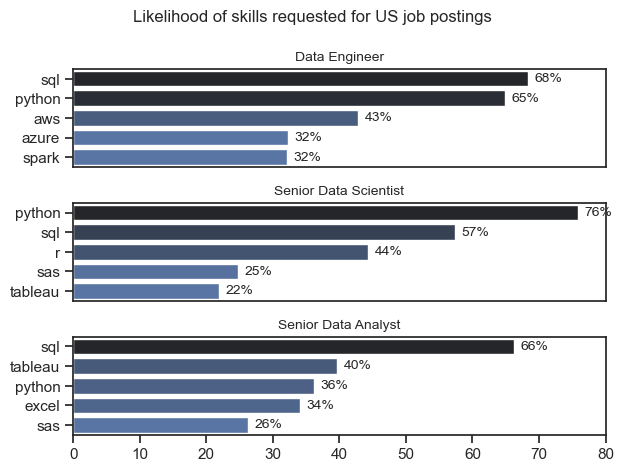

In [126]:
fig, ax = plt.subplots(3,1)
sns.set_theme(style = 'ticks')

for i, job_title in  enumerate (job_titles):
    df_yo = df_skills_perc[df_skills_perc['job_title_short'] == job_title].sort_values(by = 'count', ascending = False).head(5)
    #df_yo.plot(kind = 'barh', x = 'job_skills', y = 'skill_perc',ax = ax[i], title = job_title, legend = False)
    sns.barplot(data = df_yo, x = 'skill_perc', y = 'job_skills', ax =ax[i], hue = 'count', palette = 'dark:b_r')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_title(job_title, fontsize = 10)
    ax[i].set_xlim(0, 80)
    
    for n,v in enumerate(df_yo['skill_perc']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va = 'center', fontsize = 10)

    if i != 2:
        ax[i].set_xticks([])
    
plt.suptitle('Likelihood of skills requested for US job postings', fontsize = 12)
plt.tight_layout()
plt.show()